In [10]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# import pandas as pd
# import tempfile
# import os

# # Initialize the Kaggle API
# api = KaggleApi()
# api.authenticate()

# # Specify the dataset and file name
# dataset_ref = 'camnugent/california-housing-prices'
# file_name = 'housing.csv'

# # Create a temporary directory to store the downloaded file
# with tempfile.TemporaryDirectory() as temp_dir:
#     # Download the file to the temporary directory
#     file_content = api.dataset_download_file(
#         dataset_ref,
#         file_name=file_name,
#         path=temp_dir,
#         force=True  # Overwrite if the file already exists
#     )
    
#     print(f"File Content: {file_content}")
    
#     # Construct the full path to the downloaded file
#     downloaded_file_path = os.path.join(temp_dir, file_name)
    
#     # Check if the file was downloaded successfully
#     if not os.path.isfile(downloaded_file_path):
#         raise FileNotFoundError(f"The file {file_name} was not downloaded successfully.")
    
#     # Load the file into a pandas Dataframe
#     df = pd.read_csv(downloaded_file_path)

# # Display the first 5 rows
# df.head()

In [1]:
import pandas as pd
import seaborn as sns

import pathlib
import os

In [2]:
# notebook_path = pathlib.Path(os.path.abspath(os.getcwd()))
# notebook_path

In [3]:
notebook_path = pathlib.Path.cwd()
notebook_path

PosixPath('/Users/sebastian/Improvement/ai/ai_practice/machine_learning_projects/unsupervised_learning/2_clusterization_with_k-means')

In [4]:
# project_root = notebook_path.parent.parent.parent
# project_root

In [5]:
# Define the target directory name
target_dir = 'ai_practice'

In [6]:
# Iterate through the parent directories until we find the target directory
for parent in notebook_path.parents:
    # print(parent, parent.name)
    if parent.name == target_dir:
        project_root = parent
        break

# Use the project root to construct paths to the csv file
csv_path = project_root / 'assets/files' / 'california_housing' / 'housing.csv'
# csv_path = project_root / 'assets' / 'files' / 'california_housing' / 'housing.csv'
    

In [7]:
df = pd.read_csv(csv_path, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

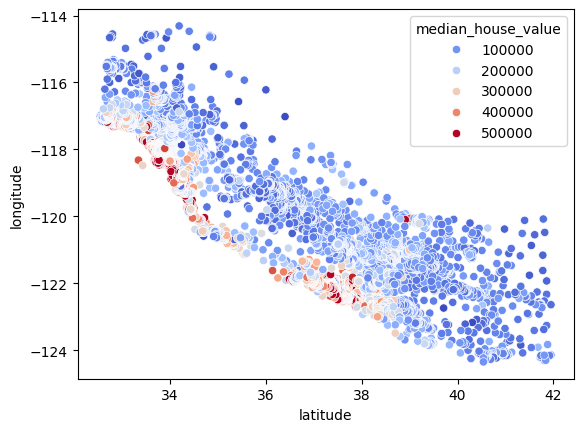

In [11]:
# First, create a map displaying different house prices in different locations
sns.scatterplot(data=df, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

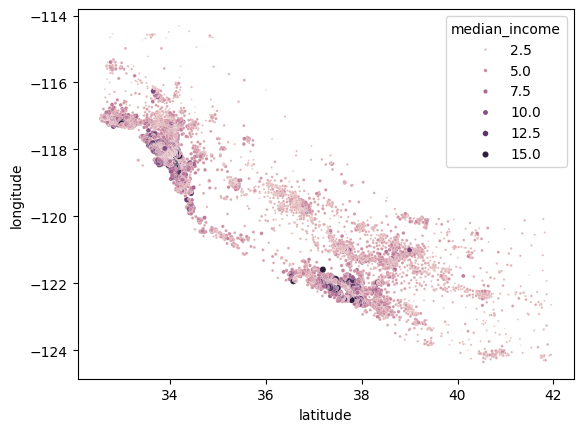

In [16]:
# Next, create a map displaying incomes of people in various locations
sns.scatterplot(data=df, x='latitude', y='longitude', hue='median_income', size='median_income', sizes=(0.2, 20))

Those who earn less are quite distributed. 

Let's say we want marketing campaign to different places in California based on the social economic statuses of people's earnings. The map above doesn't help much. It's much better to have different number categories, say five or six, to apply to different campaigns to them. Here, the K-Means algorithm becomes useful!

Unlike most other algorithms, K-Means only requires fields that we want to analyze. We can only feed the algorithm with a new dataframe with selected fields that the machine should study, instead of passing the entire dataframe to the algorithm.

In [17]:
df_k_means = df.loc[:, ['latitude', 'longitude', 'median_income']]
df_k_means


,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


Also unlike most other algorithms that require `X` and `y` to train the data, K-Means only requires `X`.

K-Means has two main hyper-parameters: `n_clusters` and `max_iter`.
- `n_clusters` - The number of clusters or groups to form. Test with different values to find the best result.
- `max_iter` - Maximum number of iterations of the algorithm. 

K-Means uses the method `.fit_predict()` as the `predictions`.

In [35]:
from sklearn.cluster import KMeans

X = df_k_means

model = KMeans(n_clusters=3)

predictions = model.fit_predict(X)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Now, the `predictions` is a list of numbers that correspond to the clusters that the data points have been assigned to. We can append the `predictions` to the original dataframe to see the clusters that the data points have been assigned to.

In [36]:
X['economy_segment'] = predictions

In [37]:
X.head()

,latitude,longitude,median_income,economy_segment
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1


In [38]:
# Check unique values of the `economic_segment` column

X.economy_segment.value_counts()

economy_segment
2    9362
1    8452
0    2826
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

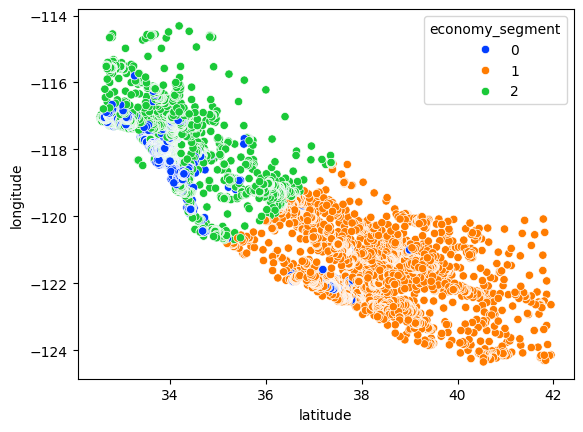

In [39]:
# Visualize the scatter plot with `n_clusters=3`
sns.scatterplot(data=X, x='latitude', y='longitude', hue='economy_segment', palette='bright')

We now see the segments. Literally, we could already start the campaign with the result. However, to fine-tune it for even better results, we can try shifting the `n_clusters` value.

In [40]:
# Create the model again, with `n_clusters=6`

model = KMeans(n_clusters=6)
predictions = model.fit_predict(X)
X.drop(['economy_segment'], axis=1)
X['economy_segment'] = predictions
X.head()

,latitude,longitude,median_income,economy_segment
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,0


In [41]:
X.economy_segment.value_counts()

economy_segment
0    5483
1    4861
4    4501
5    2978
2    2433
3     384
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

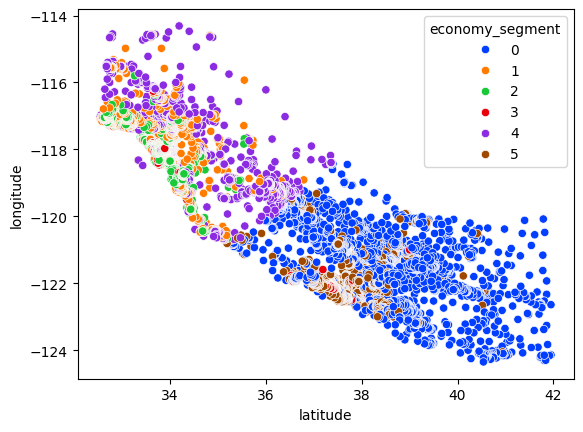

In [42]:
sns.scatterplot(data=X, x='latitude', y='longitude', hue='economy_segment', palette='bright')

With the new scatter plot, it's still not very clear.

<Axes: xlabel='economy_segment', ylabel='count'>

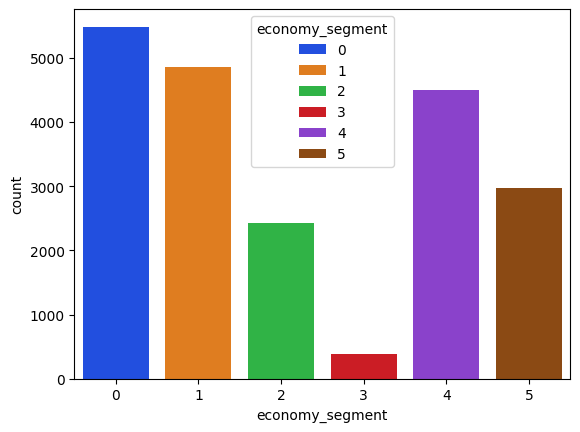

In [47]:
# Find the segment with the least number of count
sns.countplot(data=X, x='economy_segment', hue='economy_segment', palette='bright')

The segment `3` got the least count. We assume that this segment is of those with the highest median_income. To confirm, use the `group_by` method:

In [49]:
# X.groupby(by=['economy_segment']).agg({'median_income': 'mean'}) # or
X.groupby(['economy_segment'])['median_income'].mean()

economy_segment
0     2.754270
1     3.916905
2     6.205845
3    11.383392
4     2.255178
5     5.415820
Name: median_income, dtype: float64

And we can confirm that our hypothesis was right.

Finally, we manage to segment the dataframe. If we would like to run a marketing campaign to target a specific types of people, say the segment 0, 1, and 4 (the low income ones), we know where to do it.

# Use the same method, cluster the population per households.

In [50]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
# Create a new dataframe for k-means clustering using `population / households`

population = df.population.astype(float)
households = df.households.astype(float)
pop_per_household = population / households

df_k_means = df.loc[:, ['latitude', 'longitude']]
df_k_means['pop_per_household'] = pop_per_household

df_k_means.head()

,latitude,longitude,pop_per_household
0,37.88,-122.23,2.555556
1,37.86,-122.22,2.109842
2,37.85,-122.24,2.802260
3,37.85,-122.25,2.547945
4,37.85,-122.25,2.181467


In [73]:
# Create a function that returns X with parameters `n_clusters`

def create_clusters(df, n_clusters):
    
    # Create a new dataframe from df
    df_k_means = df.loc[:, ['latitude', 'longitude']]
    
    # Create a series of population per household
    pop_per_household = df.population.astype(float) / df.households.astype(float)
    
    # Append the series to the new dataframe
    df_k_means['pop_per_household'] = pop_per_household
    
    # Use the KMeans algorithm to return the new dataframe showing economy_segment
    X= df_k_means
    model = KMeans(n_clusters=n_clusters)
    predictions = model.fit_predict(X)
    X['economy_segment'] = predictions
    
    return X

def scatter_plot_from_clusters(data):
    scatter_plot = sns.scatterplot(data=data, x='latitude', y='longitude', hue='economy_segment', palette='bright')
    
    return scatter_plot

In [70]:
# Case: n_clusters = 3
X = create_clusters(df, 3)
X.head()

,latitude,longitude,pop_per_household,economy_segment
0,37.88,-122.23,2.555556,0
1,37.86,-122.22,2.109842,0
2,37.85,-122.24,2.802260,0
3,37.85,-122.25,2.547945,0
4,37.85,-122.25,2.181467,0


In [71]:
X.economy_segment.value_counts()

economy_segment
0    20637
2        2
1        1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

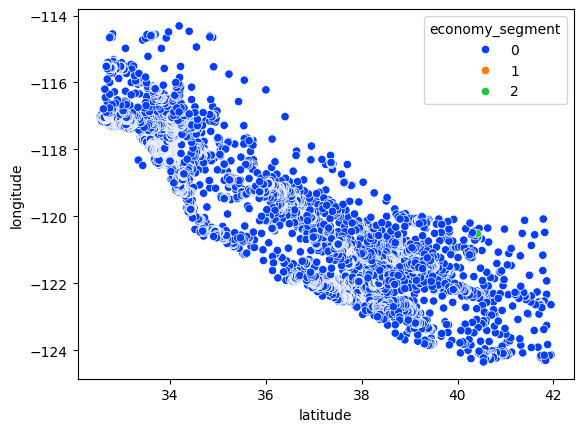

In [74]:
scatter_plot_from_clusters(X)

Obviously, `n_clusters=3` doesn't show clear segments.

In [75]:
# Case: n_clusters = 6
X = create_clusters(df, 6)
X.head()

,latitude,longitude,pop_per_household,economy_segment
0,37.88,-122.23,2.555556,0
1,37.86,-122.22,2.109842,0
2,37.85,-122.24,2.802260,0
3,37.85,-122.25,2.547945,0
4,37.85,-122.25,2.181467,0


In [76]:
X.economy_segment.value_counts()

economy_segment
3    11955
0     8676
4        5
1        2
5        1
2        1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

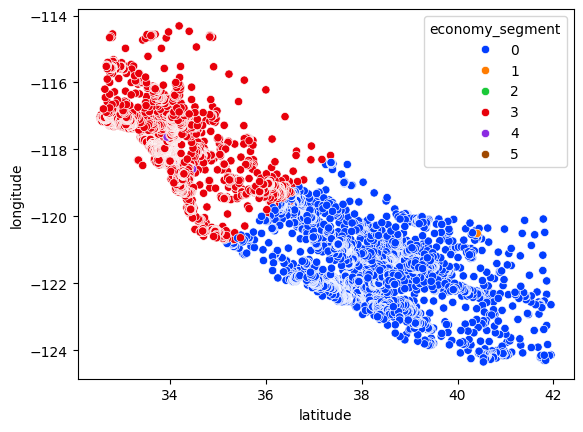

In [77]:
scatter_plot_from_clusters(X)

In [78]:
# Try increasing the number of clusters
X = create_clusters(df, 12)
X.economy_segment.value_counts()

economy_segment
7     6744
11    4320
8     2705
2     2332
6     2103
4     1623
0      804
9        5
1        1
5        1
10       1
3        1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

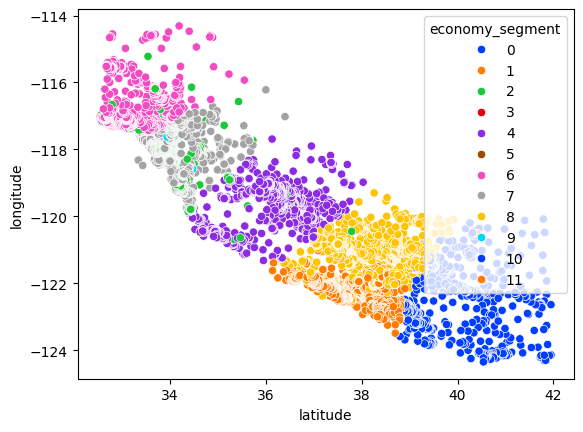

In [79]:
scatter_plot_from_clusters(X)

In [ ]:
# This is the original dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
# This is the k-means dataframe
X.head()

,latitude,longitude,pop_per_household,economy_segment
0,37.88,-122.23,2.555556,11
1,37.86,-122.22,2.109842,11
2,37.85,-122.24,2.802260,11
3,37.85,-122.25,2.547945,11
4,37.85,-122.25,2.181467,11


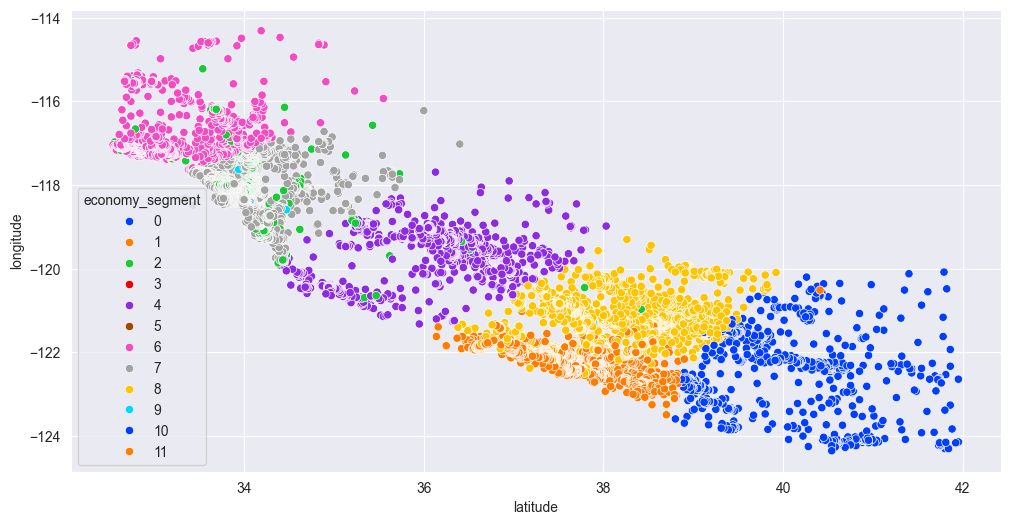

In [84]:
# This is the scatter plot
sns.set_theme({'figure.figsize': (12, 6)})
scatter_plot = sns.scatterplot(data=X, x='latitude', y='longitude', hue='economy_segment', palette='bright')

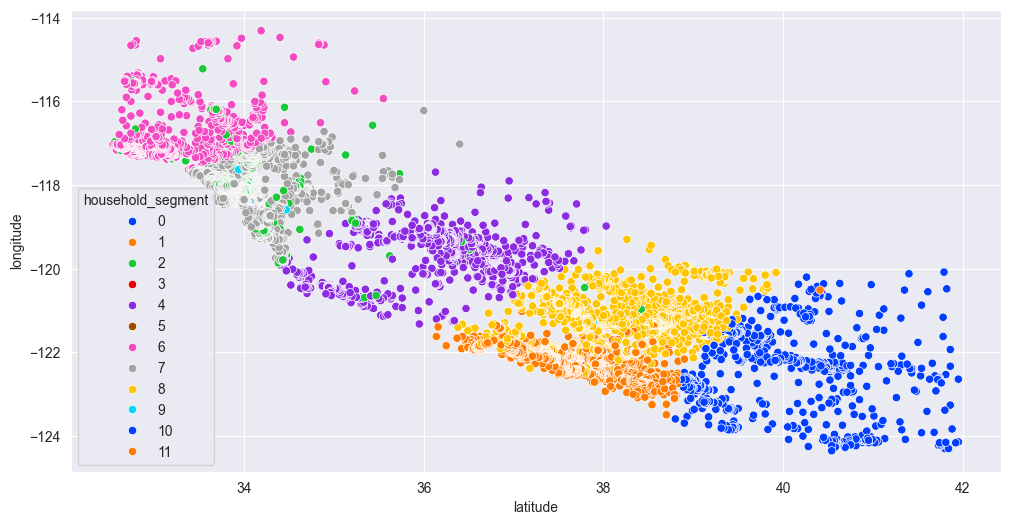

In [85]:
# 'economy_segment' is not suitable when studying the households, let's rename it to 'household_segment'

X = X.rename(columns={'economy_segment': 'household_segment'})
scatter_plot = sns.scatterplot(data=X, x='latitude', y='longitude', hue='household_segment', palette='bright')

Looking at the clustering above, here are several valuable insights and potential applications:

### Geographic Pattern Recognition:

- Different household segments form distinct geographical clusters
- This suggests that similar household types tend to concentrate in specific areas
- Could help understand natural neighborhood formations and community patterns


### Urban Planning Applications:

- Identify areas with similar household characteristics for targeted infrastructure development
- Plan public services (schools, community centers, transit) based on household segment needs
- Develop zoning policies that account for natural household clustering patterns


### Real Estate and Housing Development:

- Help developers understand where similar household types cluster
- Guide decisions about what types of housing to build in different areas
- Assist in property valuation by understanding neighborhood composition


### Public Policy and Services:

- Target public programs to specific household segments
- Distribute resources based on household segment needs
- Plan emergency services coverage based on population patterns


### Market Analysis:

- Help businesses understand local demographic patterns
- Guide retail location decisions
- Customize services based on dominant household segments in each area


### Community Services:

- Optimize locations for community facilities
- Plan social services distribution
- Design community programs tailored to local household types